<a href="https://colab.research.google.com/github/FranciscoRamirezRuiz/Inferencia2024/blob/main/inferencia_unificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Cargar el archivo Housing.csv
# Asegúrate de subir primero el archivo en el entorno de Colab
from google.colab import files
uploaded = files.upload()

# Leer el archivo (ajusta el nombre si cambia)
df = pd.read_csv("Housing.csv")

# Mostrar las primeras filas
df.head()


Saving Housing.csv to Housing (1).csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.1Detección y Tratamiento de Valores Faltantes

In [13]:
# Tipo de dato de cada columna
data_types = df.dtypes

# Cantidad de valores únicos por columna
unique_counts = df.nunique()

# Valores faltantes por columna
missing_values = df.isnull().sum()

# Crear resumen general
overview = pd.DataFrame({
    'Tipo de Dato': data_types,
    'Valores Únicos': unique_counts,
    'Valores Faltantes': missing_values
})

# Mostrar el resumen
overview


,Tipo de Dato,Valores Únicos,Valores Faltantes
id,int64,21436,0
date,object,372,0
price,float64,4029,0
bedrooms,int64,13,0
bathrooms,float64,30,0
sqft_living,int64,1038,0
sqft_lot,int64,9782,0
floors,float64,6,0
waterfront,int64,2,0
view,int64,5,0


# 1.2Identificación y Manejo de Outliers

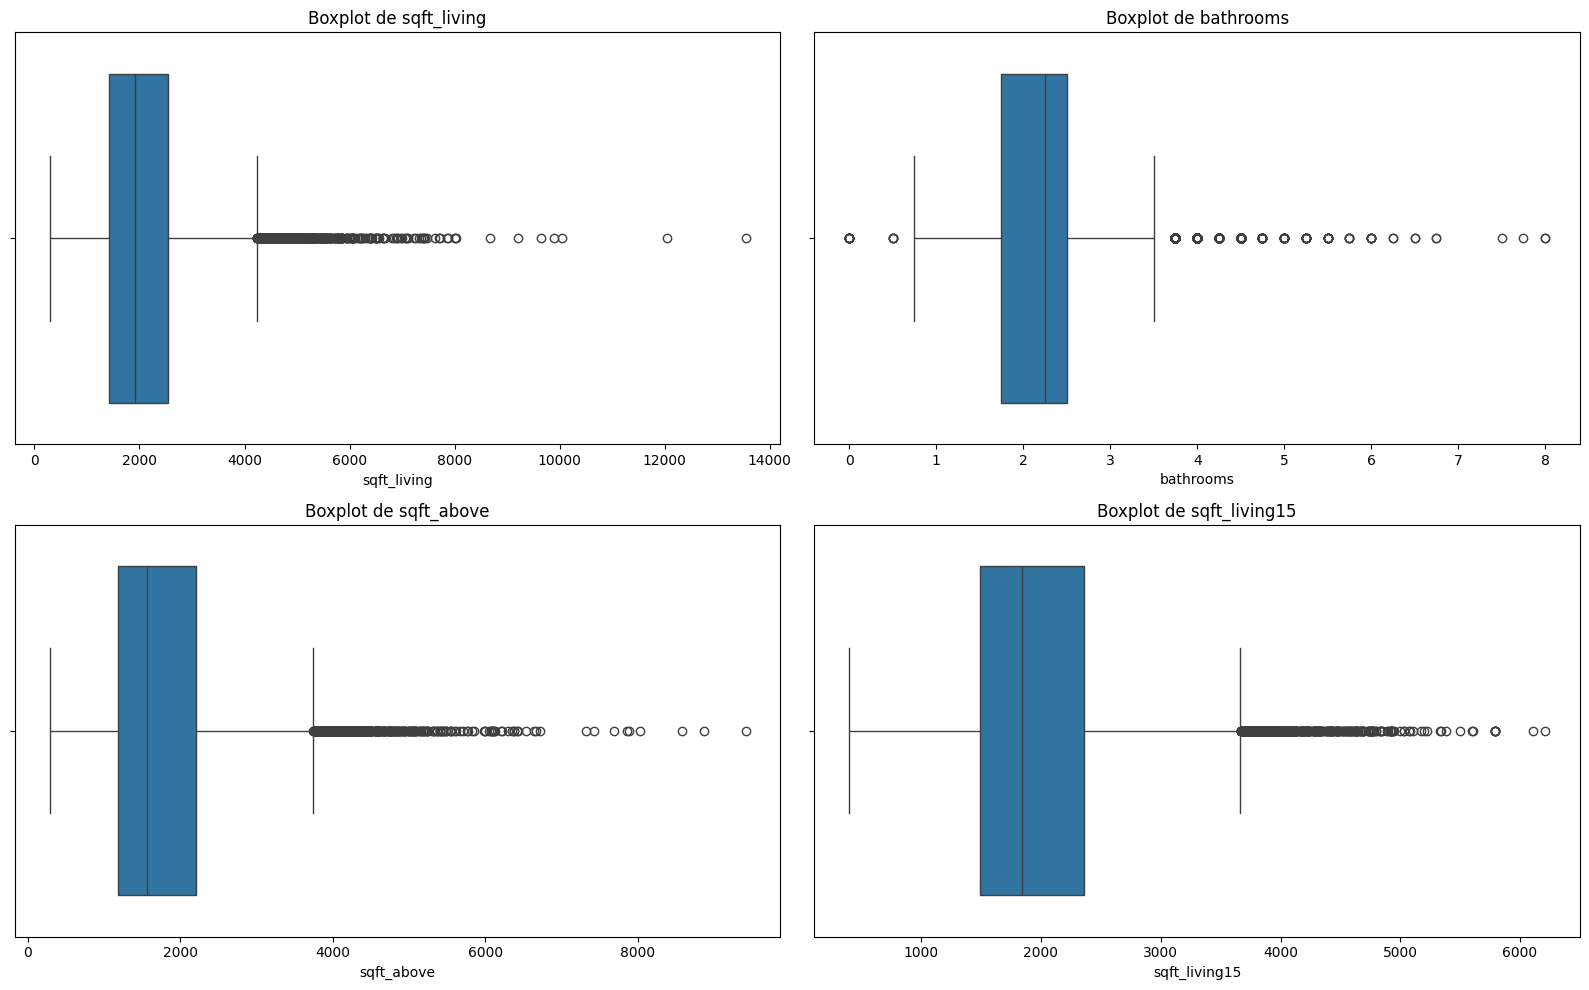

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables clave a analizar
variables = ['sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15']

# Crear subplots
plt.figure(figsize=(16, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()


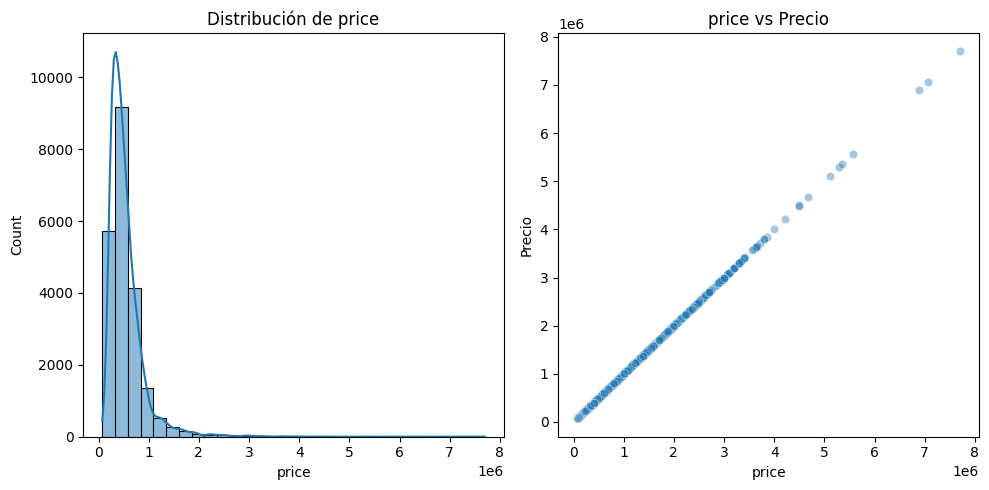

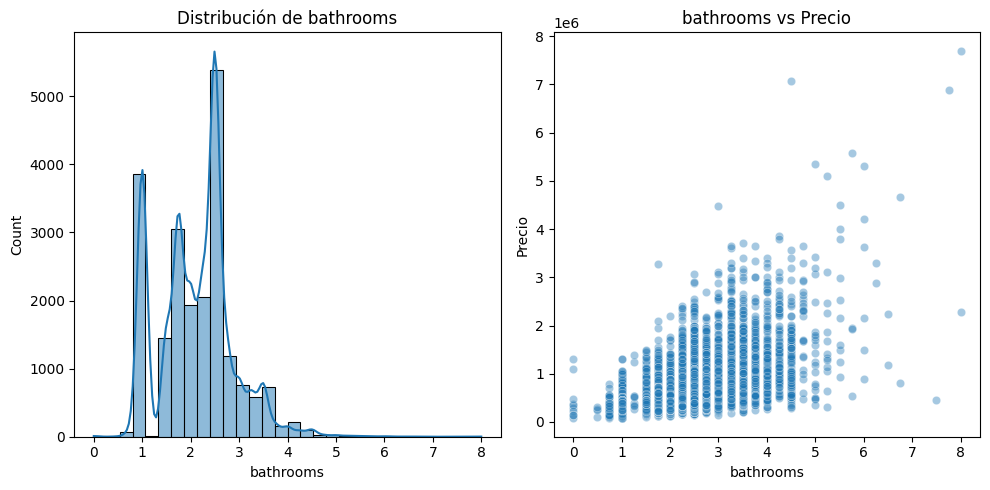

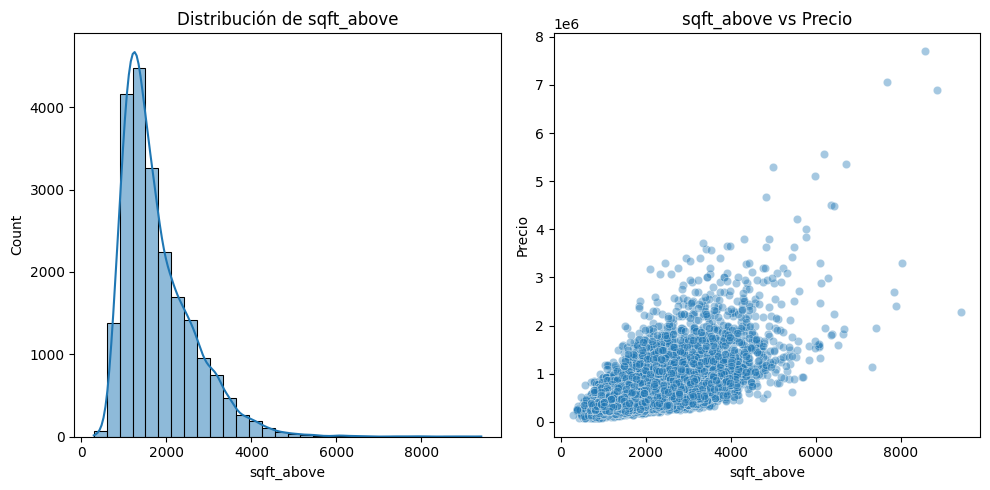

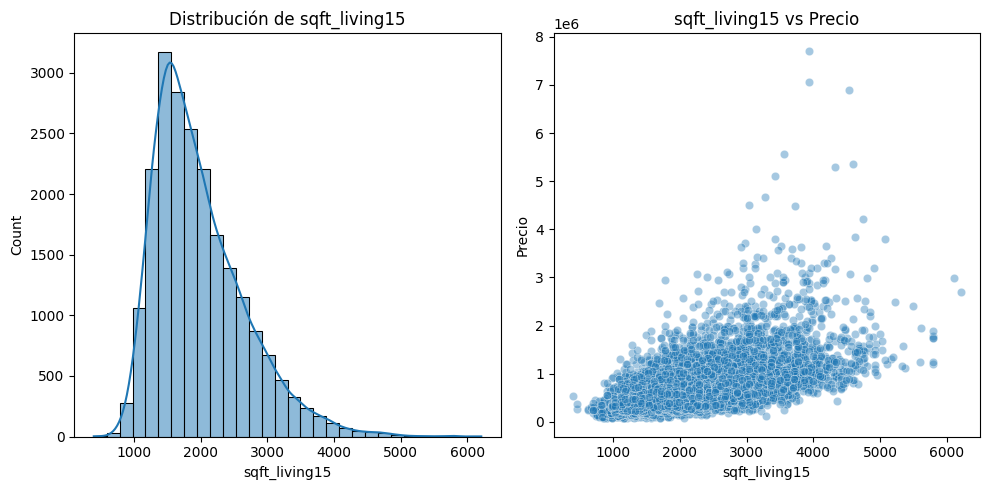

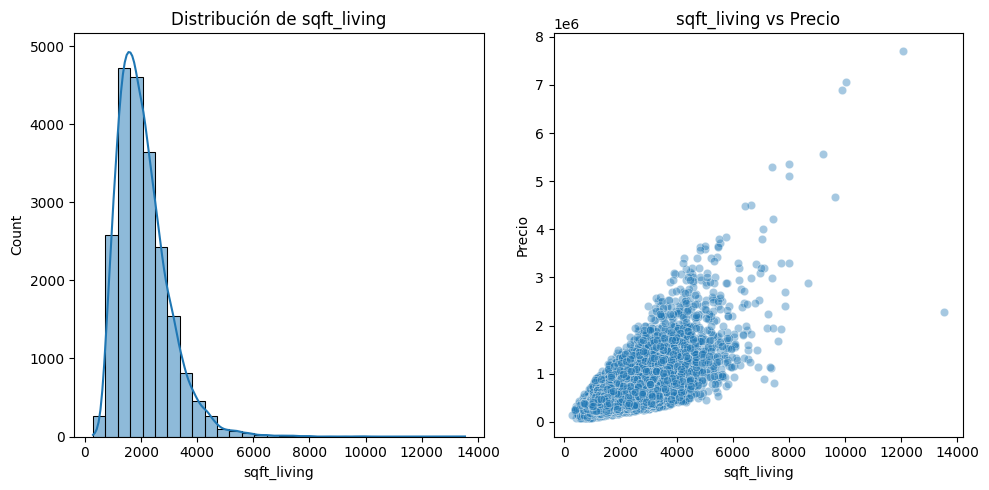

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables
variables = ['price', 'bathrooms', 'sqft_above', 'sqft_living15', 'sqft_living' ]

# Crear un gráfico para cada variable
for var in variables:
    plt.figure(figsize=(10, 5))

    # Histograma con KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)

    # Dispersión contra el precio
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df[var], y=df['price'], alpha=0.4)
    plt.title(f'{var} vs Precio')
    plt.xlabel(var)
    plt.ylabel('Precio')

    plt.tight_layout()
    plt.show()


In [16]:
# Función para detectar outliers usando el rango intercuartílico
def detectar_outliers_iqr(columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Aplicar a las variables clave
for var in variables:
    outliers, li, ls = detectar_outliers_iqr(var)
    print(f"\nVariable: {var}")
    print(f"Outliers detectados: {len(outliers)}")
    print(f"Rango aceptable: {li:.2f} a {ls:.2f}")



Variable: sqft_living
Outliers detectados: 572
Rango aceptable: -257.50 a 4234.50

Variable: bathrooms
Outliers detectados: 571
Rango aceptable: 0.62 a 3.62

Variable: sqft_above
Outliers detectados: 611
Rango aceptable: -340.00 a 3740.00

Variable: sqft_living15
Outliers detectados: 544
Rango aceptable: 185.00 a 3665.00


# 1.3Estandarización de formatos y unidades

In [17]:
# Convertir 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'].str[:8], format='%Y%m%d')

# Convertir columnas que son categorías codificadas a tipo 'category'
cat_columns = ['waterfront', 'view', 'condition', 'grade', 'zipcode']
df[cat_columns] = df[cat_columns].astype('category')

# Verificar cambios
df.dtypes.loc[['date'] + cat_columns]


,0
date,datetime64[ns]
waterfront,category
view,category
condition,category
grade,category
zipcode,category


# 1.4Normalización o Estandarización de Variables

In [32]:
from sklearn.preprocessing import StandardScaler

# Variables a estandarizar
vars_to_scale = ['price', 'bathrooms', 'sqft_above', 'sqft_living15', 'sqft_living' ]

# Crear el scaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[vars_to_scale] = scaler.fit_transform(df[vars_to_scale])

# Verificar los primeros valores transformados
df_scaled[vars_to_scale].head()


,price,bathrooms,sqft_above,sqft_living15,sqft_living
0,-0.841115,-1.447464,-0.734708,-0.943355,-0.979835
1,-0.005689,0.175607,0.460841,-0.432686,0.533634
2,-0.980852,-1.447464,-1.229834,1.070140,-1.426254
3,0.174089,1.149449,-0.891699,-0.914174,-0.130550
4,-0.081959,-0.149007,-0.130895,-0.272190,-0.435422


# 2.1Estadísticas Descriptivas Básicas

In [19]:
# Estadísticas para todas las variables numéricas
df.describe().T


,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580306147.70999,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876569751.888593
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.57669,75000.0,321950.0,450000.0,645000.0,7700000.0,367126.825086
bedrooms,21613.0,3.370795,0.0,3.0,3.0,4.0,33.0,0.930105
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
sqft_above,21613.0,1788.390691,290.0,1190.0,1560.0,2210.0,9410.0,828.090978
sqft_basement,21613.0,291.509045,0.0,0.0,0.0,560.0,4820.0,442.575043


# 2.2Análisis Gráfico

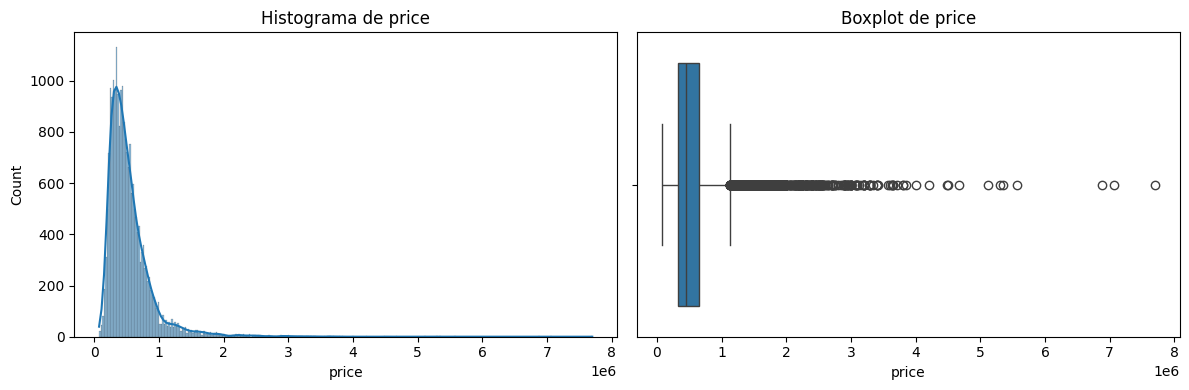

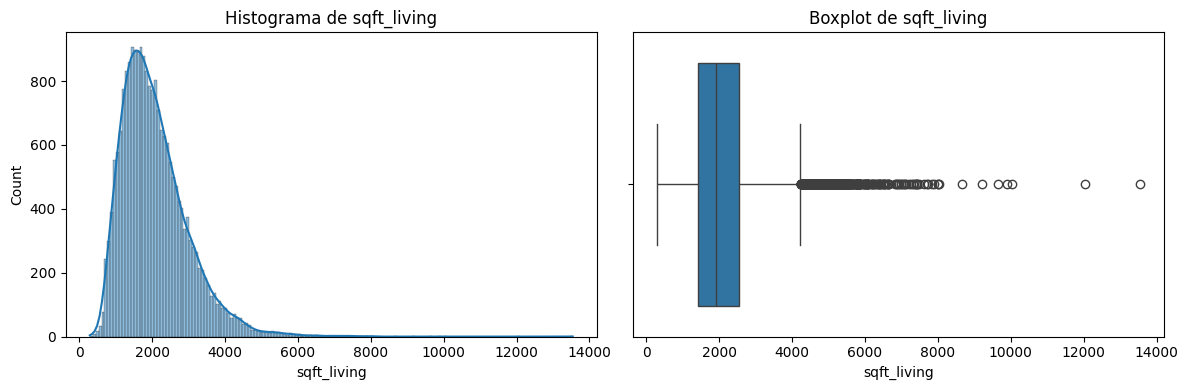

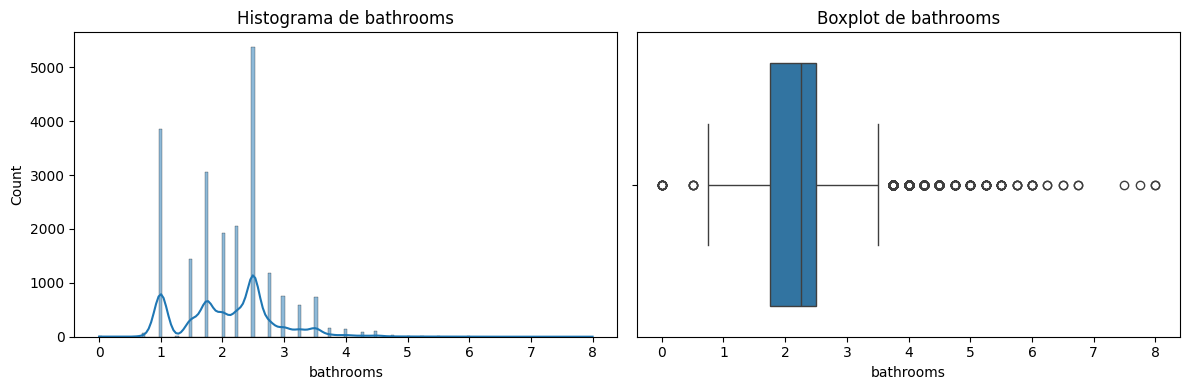

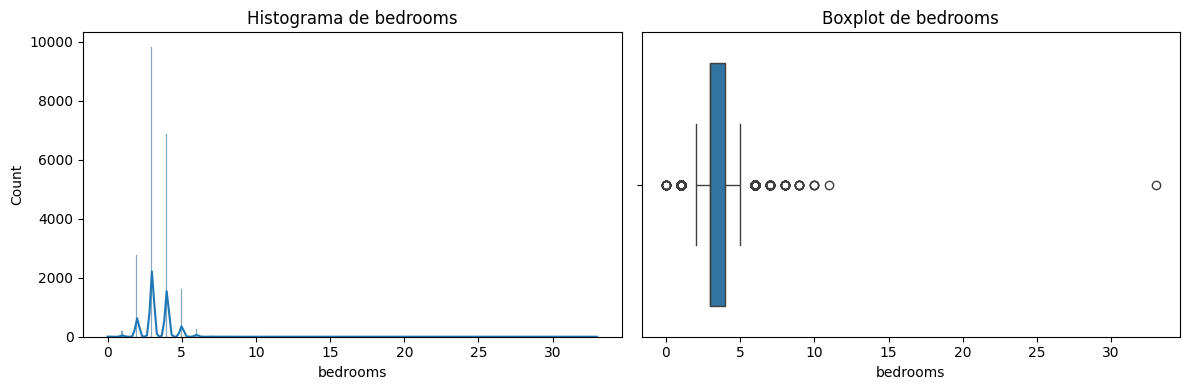

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['price', 'sqft_living', 'bathrooms', 'bedrooms']

# Histograma + Boxplot para cada variable
for var in variables:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()


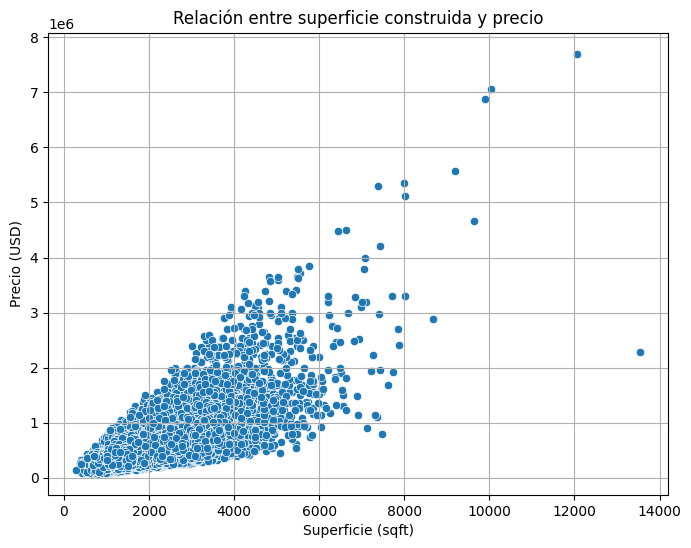

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title("Relación entre superficie construida y precio")
plt.xlabel("Superficie (sqft)")
plt.ylabel("Precio (USD)")
plt.grid()
plt.show()


# 2.3 Correlaciones

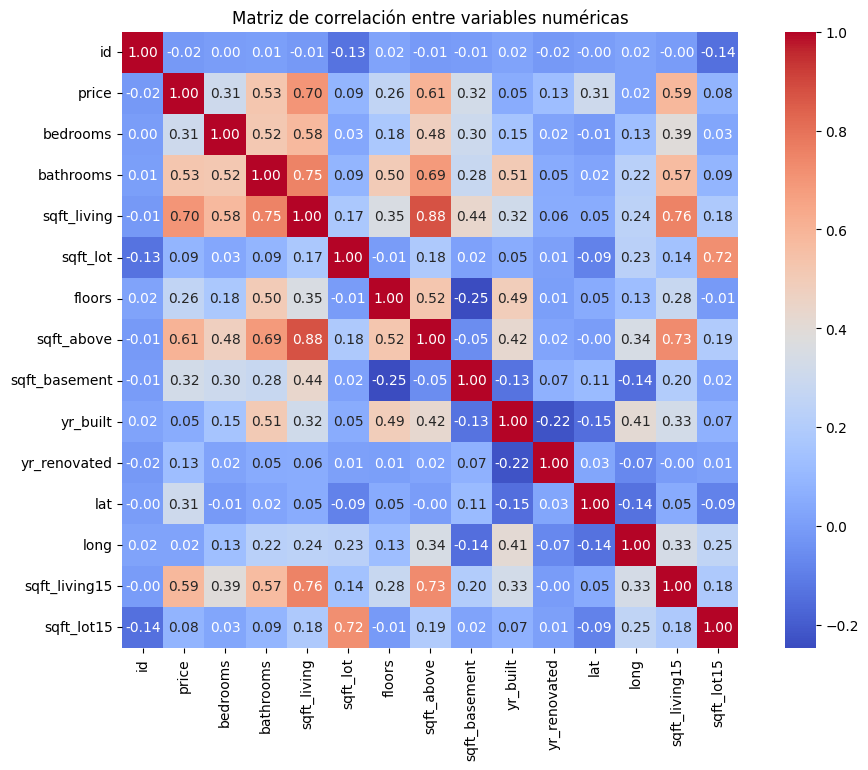

In [22]:
# Matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


# 2.4Evaluación de la Normalidad

In [23]:
from scipy.stats import shapiro

for var in variables:
    stat, p = shapiro(df[var].sample(500))  # Muestra de 500 para evitar error de tamaño
    print(f"{var}: p-valor = {p:.4f} → {'No normal' if p < 0.05 else 'Distribución normal'}")


price: p-valor = 0.0000 → No normal
sqft_living: p-valor = 0.0000 → No normal
bathrooms: p-valor = 0.0000 → No normal
bedrooms: p-valor = 0.0000 → No normal


# 3Elección del Modelo

In [24]:
from sklearn.model_selection import train_test_split

# Seleccionamos algunas variables predictoras relevantes
features = ['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'condition',
            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode']

X = df[features]
y = df['price']

# Convertimos variables categóricas a dummies (One-Hot Encoding)
X = pd.get_dummies(X, columns=['waterfront', 'view', 'condition', 'grade', 'zipcode'], drop_first=True)

# Dividir en datos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred = rf_model.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")


MAE:  90,190.34
RMSE: 181,061.56
R²:   0.7831


#4.1Ajuste de Hiperparámetros Grid Search

#4.2 Evaluar el modelo óptimo

# Sección nueva

In [ ]:
# Correlación de cada variable numérica con el precio
correlation_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)
correlation_with_price


,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585378
bathrooms,0.525136
view,0.397294
sqft_basement,0.323816
bedrooms,0.308377
lat,0.307003


In [ ]:
import statsmodels.api as sm

# Usamos las mismas features de antes, eliminando las categóricas codificadas
X_reg = df[['sqft_living', 'bathrooms', 'bedrooms', 'floors', 'sqft_above', 'sqft_basement']]
X_reg = sm.add_constant(X_reg)  # agrega intercepto
y_reg = df['price']

# Modelo OLS (mínimos cuadrados ordinarios)
model = sm.OLS(y_reg, X_reg).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     4464.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:50:54   Log-Likelihood:            -2.9994e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21607   BIC:                         5.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.823e+04   7721.579      8.836